In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

binary_path = os.path.join(ROOT_DIR, "TrafficLabelling", "data_binary.csv")
multi_path = os.path.join(ROOT_DIR, "TrafficLabelling", "data_multi_class.csv")

data_binary = pd.read_csv(binary_path)
data_multiclass = pd.read_csv(multi_path)

In [16]:
data_binary.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std,Label
0,54865,3,2,12,6,6,6.0,0,4.000000e+06,666666.66670,...,0,1,0,0,20,0.0,0.0,0,0.0,BENIGN
1,55054,109,1,6,6,6,6.0,6,1.100917e+05,18348.62385,...,0,1,1,1,20,0.0,0.0,0,0.0,BENIGN
2,55055,52,1,6,6,6,6.0,6,2.307692e+05,38461.53846,...,0,1,1,1,20,0.0,0.0,0,0.0,BENIGN
3,46236,34,1,6,6,6,6.0,6,3.529412e+05,58823.52941,...,0,1,1,1,20,0.0,0.0,0,0.0,BENIGN
4,54863,3,2,12,6,6,6.0,0,4.000000e+06,666666.66670,...,0,1,0,0,20,0.0,0.0,0,0.0,BENIGN


In [33]:
pd.set_option('display.max_rows', None)  # hiển thị tất cả dòng
pd.set_option('display.max_columns', None)  # hiển thị tất cả cột
pd.set_option("display.float_format", "{:.2f}".format)

In [34]:
summary = data_binary.describe().T[['min','max','mean']]
# Hiển thị toàn bộ bảng (không bị cắt)
pd.set_option('display.max_rows', None)  # hiển thị tất cả dòng
pd.set_option('display.max_columns', None)  # hiển thị tất cả cột

# Hiển thị số ở dạng thường, làm tròn 2 chữ số thập phân
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print(summary)


                             min              max          mean
Destination Port            0.00        65,535.00      8,082.87
Flow Duration               0.00   119,999,998.00 14,748,704.34
Total Fwd Packets           1.00       112,141.00          5.73
Total Length of Fwd Packets 0.00    12,900,000.00        526.25
Fwd Packet Length Max       0.00        24,820.00        207.18
Fwd Packet Length Min       0.00         2,325.00         18.75
Fwd Packet Length Mean      0.00         5,940.86         58.21
Bwd Packet Length Min       0.00         2,896.00         41.12
Flow Bytes/s                0.00 2,071,000,000.00  1,492,814.16
Flow Packets/s              0.00     4,000,000.00     70,954.79
Flow IAT Mean               0.00   120,000,000.00  1,298,652.66
Flow IAT Std                0.00    84,800,261.57  2,919,048.40
Flow IAT Min                0.00   120,000,000.00    162,672.48
Fwd IAT Std                 0.00    84,602,929.28  3,265,496.50
Fwd IAT Min                 0.00   120,0

In [35]:
print("Tổng số giá trị thiếu:", data_binary.isnull().sum().sum())
print("Tổng số giá trị thiếu:", data_multiclass.isnull().sum().sum())

Tổng số giá trị thiếu: 0
Tổng số giá trị thiếu: 0


In [36]:
all_zero_cols = [col for col in data_binary.columns if (data_binary[col].nunique() == 1 and data_binary[col].iloc[0] == 0)]

print("Các cột toàn 0:")
for col in all_zero_cols:
    print(f"- {col}")


Các cột toàn 0:


In [37]:
data_binary = data_binary.drop(columns=all_zero_cols)
data_multiclass = data_multiclass.drop(columns=all_zero_cols)

In [38]:
numeric_cols = data_binary.select_dtypes(include="number")
neg_count = (numeric_cols < 0).sum()
neg_percent = neg_count / len(data_binary) * 100
result = pd.DataFrame({
    "Số âm": neg_count,
    "Tỷ lệ %": neg_percent
})
result["Tỷ lệ %"] = result["Tỷ lệ %"].map(lambda x: f"{x:.10f}")
print(result)


                             Số âm       Tỷ lệ %
Destination Port                 0  0.0000000000
Flow Duration                    0  0.0000000000
Total Fwd Packets                0  0.0000000000
Total Length of Fwd Packets      0  0.0000000000
Fwd Packet Length Max            0  0.0000000000
Fwd Packet Length Min            0  0.0000000000
Fwd Packet Length Mean           0  0.0000000000
Bwd Packet Length Min            0  0.0000000000
Flow Bytes/s                     0  0.0000000000
Flow Packets/s                   0  0.0000000000
Flow IAT Mean                    0  0.0000000000
Flow IAT Std                     0  0.0000000000
Flow IAT Min                     0  0.0000000000
Fwd IAT Std                      0  0.0000000000
Fwd IAT Min                      0  0.0000000000
Bwd IAT Total                    0  0.0000000000
Bwd IAT Mean                     0  0.0000000000
Bwd IAT Std                      0  0.0000000000
Bwd IAT Max                      0  0.0000000000
Fwd PSH Flags       

In [39]:
data_binary = data_binary.drop(columns=["Init_Win_bytes_backward", "Init_Win_bytes_forward"])
data_multiclass = data_multiclass.drop(columns=["Init_Win_bytes_backward", "Init_Win_bytes_forward"])

KeyError: "['Init_Win_bytes_backward', 'Init_Win_bytes_forward'] not found in axis"

In [ ]:
# Chọn các cột số
numeric_cols = data_binary.select_dtypes(include="number")

# Giữ lại chỉ những hàng mà tất cả giá trị số đều >= 0
data_binary = data_binary[(numeric_cols >= 0).all(axis=1)]
data_multiclass = data_multiclass[(numeric_cols >= 0).all(axis=1)]


In [ ]:
print(data_binary["Label"].value_counts())
print(data_multiclass["Label"].value_counts())

Label
BENIGN    2270365
ATTACK     555272
Name: count, dtype: int64
Label
BENIGN            2270365
DOS_DDOS           380505
PROBE_PORTSCAN     158930
CRED_WEB            13829
R2L_U2R_OTHER        2008
Name: count, dtype: int64


In [ ]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2825637 entries, 0 to 2828562
Data columns (total 69 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow 

In [ ]:
data_binary.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,"2,825,637.00","8,082.87","18,294.53",0.00,53.00,80.00,443.00,"65,535.00"
Flow Duration,"2,825,637.00","14,748,704.34","33,618,106.59",0.00,155.00,"31,286.00","3,073,944.00","119,999,998.00"
Total Fwd Packets,"2,825,637.00",5.73,74.35,1.00,2.00,2.00,5.00,"112,141.00"
Total Backward Packets,"2,825,637.00",5.55,102.96,0.00,1.00,2.00,4.00,"157,388.00"
Total Length of Fwd Packets,"2,825,637.00",526.25,"9,116.50",0.00,12.00,62.00,187.00,"12,900,000.00"
Total Length of Bwd Packets,"2,825,637.00","5,343.43","250,509.29",0.00,2.00,122.00,480.00,"399,000,000.00"
Fwd Packet Length Max,"2,825,637.00",207.18,716.59,0.00,6.00,37.00,80.00,"24,820.00"
Fwd Packet Length Min,"2,825,637.00",18.75,60.39,0.00,0.00,2.00,36.00,"2,325.00"
Fwd Packet Length Mean,"2,825,637.00",58.21,186.05,0.00,6.00,34.00,50.00,"5,940.86"
Fwd Packet Length Std,"2,825,637.00",68.85,281.16,0.00,0.00,0.00,26.16,"7,125.60"


In [ ]:
numeric_cols = data_binary.select_dtypes(include="number")

corr_matrix = numeric_cols.corr().abs()

# Lấy phần tam giác trên (để tránh trùng lặp và loại đường chéo = 1)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Tìm các cặp có corr > 0.95
high_corr = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if pd.notna(upper.loc[row, col]) and upper.loc[row, col] > 0.90
]

# Chuyển thành DataFrame để xem dễ hơn
high_corr_df = pd.DataFrame(high_corr, columns=["Feature 1", "Feature 2", "Correlation"])

print(high_corr_df.sort_values(by="Correlation", ascending=False))

                      Feature 1                    Feature 2  Correlation
35               CWE Flag Count                Fwd URG Flags         1.00
34               SYN Flag Count                Fwd PSH Flags         1.00
62          Subflow Bwd Packets       Total Backward Packets         1.00
41         Avg Fwd Segment Size       Fwd Packet Length Mean         1.00
52          Fwd Header Length.1            Fwd Header Length         1.00
54          Subflow Fwd Packets            Total Fwd Packets         1.00
43         Avg Bwd Segment Size       Bwd Packet Length Mean         1.00
70            Subflow Bwd Bytes  Total Length of Bwd Packets         1.00
60            Subflow Fwd Bytes  Total Length of Fwd Packets         1.00
8                 Fwd IAT Total                Flow Duration         1.00
12                  Fwd IAT Max                 Flow IAT Max         1.00
39          Average Packet Size           Packet Length Mean         1.00
36               ECE Flag Count       

In [ ]:
drop_collums=["CWE Flag Count","SYN Flag Count","Subflow Bwd Packets","Avg Fwd Segment Size","Fwd Header Length.1",
              "Subflow Fwd Packets","Avg Bwd Segment Size","Subflow Bwd Bytes","Subflow Fwd Bytes","Fwd IAT Total",
              "Fwd IAT Max","Average Packet Size","ECE Flag Count","Bwd Header Length","Idle Min","Idle Mean","Total Backward Packets",
              "Fwd Packets/s","Fwd Header Length","Fwd Packet Length Std","act_data_pkt_fwd","Total Length of Bwd Packets",
              "Idle Max","Packet Length Std","Bwd Packet Length Std","Bwd Packet Length Mean","Packet Length Variance","Active Min",
              "Bwd Packet Length Max","Flow IAT Max","Bwd IAT Min","Max Packet Length","Fwd IAT Mean"]
data_binary = data_binary.drop(columns=drop_collums)
data_multiclass = data_multiclass.drop(columns=drop_collums)

In [ ]:
data_binary.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,"2,825,637.00","8,082.87","18,294.53",0.00,53.00,80.00,443.00,"65,535.00"
Flow Duration,"2,825,637.00","14,748,704.34","33,618,106.59",0.00,155.00,"31,286.00","3,073,944.00","119,999,998.00"
Total Fwd Packets,"2,825,637.00",5.73,74.35,1.00,2.00,2.00,5.00,"112,141.00"
Total Length of Fwd Packets,"2,825,637.00",526.25,"9,116.50",0.00,12.00,62.00,187.00,"12,900,000.00"
Fwd Packet Length Max,"2,825,637.00",207.18,716.59,0.00,6.00,37.00,80.00,"24,820.00"
Fwd Packet Length Min,"2,825,637.00",18.75,60.39,0.00,0.00,2.00,36.00,"2,325.00"
Fwd Packet Length Mean,"2,825,637.00",58.21,186.05,0.00,6.00,34.00,50.00,"5,940.86"
Bwd Packet Length Min,"2,825,637.00",41.12,68.90,0.00,0.00,0.00,77.00,"2,896.00"
Flow Bytes/s,"2,825,637.00","1,492,814.16","25,949,335.15",0.00,119.22,"4,581.75","166,666.67","2,071,000,000.00"
Flow Packets/s,"2,825,637.00","70,954.79","254,121.44",0.00,3.40,109.75,"23,255.81","4,000,000.00"


In [40]:
# --- Binary ---
print("📊 Binary dataset label distribution:")
print(data_binary['Label'].value_counts())
print("\nTỉ lệ phần trăm:")
print((data_binary['Label'].value_counts(normalize=True) * 100).round(2))
print("=" * 60)

# --- Multiclass (bỏ BENIGN) ---
data_multiclass = data_multiclass[data_multiclass['Label'] != 'BENIGN']

print("📊 Multiclass dataset label distribution (after removing BENIGN):")
print(data_multiclass['Label'].value_counts())
print("\nTỉ lệ phần trăm:")
print((data_multiclass['Label'].value_counts(normalize=True) * 100).round(2))
print("=" * 60)

📊 Binary dataset label distribution:
Label
BENIGN    2270365
ATTACK     555272
Name: count, dtype: int64

Tỉ lệ phần trăm:
Label
BENIGN   80.35
ATTACK   19.65
Name: proportion, dtype: float64
📊 Multiclass dataset label distribution (after removing BENIGN):
Label
DOS_DDOS          380505
PROBE_PORTSCAN    158930
CRED_WEB           13829
R2L_U2R_OTHER       2008
Name: count, dtype: int64

Tỉ lệ phần trăm:
Label
DOS_DDOS         68.53
PROBE_PORTSCAN   28.62
CRED_WEB          2.49
R2L_U2R_OTHER     0.36
Name: proportion, dtype: float64


In [ ]:
# --- Lưu ---
data_binary.to_csv(os.path.join(ROOT_DIR, "TrafficLabelling", "data_binary.csv"), index=False)
data_multiclass.to_csv(os.path.join(ROOT_DIR, "TrafficLabelling", "data_multi_class.csv"), index=False)

### Scale

In [ ]:
data_binary.shape

(2825637, 36)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23980\1657393778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=scaled_df_binary, palette='Set2')


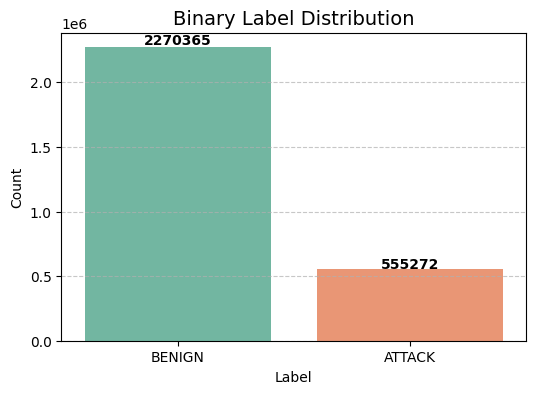

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23980\1657393778.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=scaled_df_multiclass, order=order, palette='tab10')


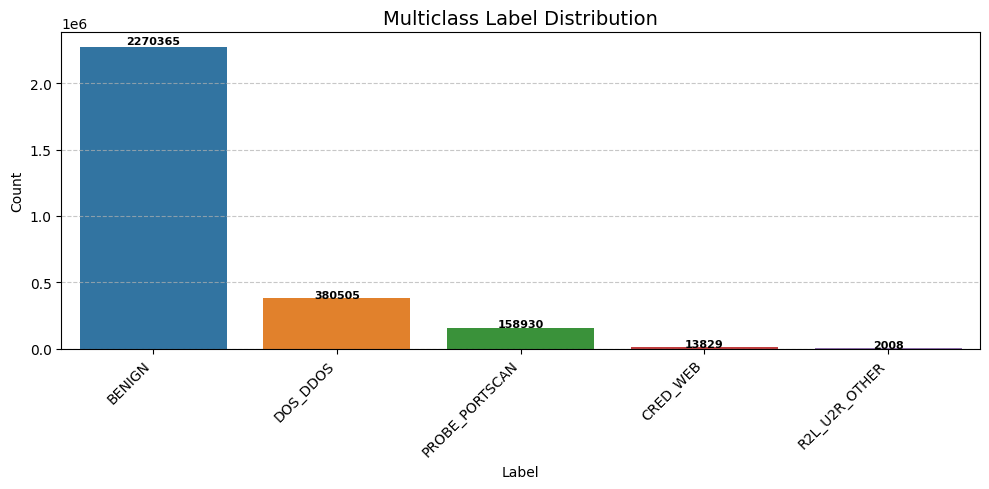

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23980\1657393778.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_dist.index, y=label_dist.values, palette='tab10')


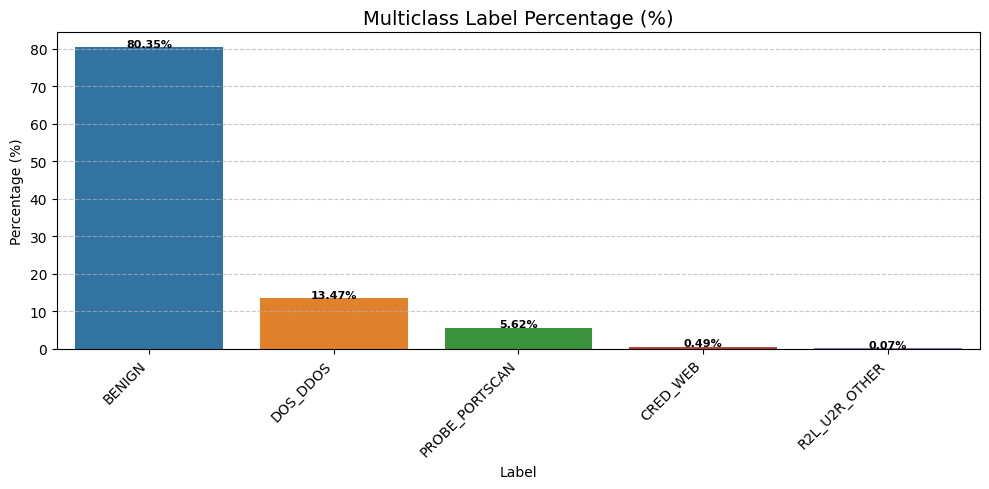

In [ ]:
# ===== 1️⃣ Binary dataset =====
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=data_binary, palette='Set2')
plt.title('Binary Label Distribution', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(data_binary['Label'].value_counts()):
    plt.text(i, v + v*0.01, str(v), ha='center', fontweight='bold')
plt.show()

# ===== 2️⃣ Multiclass dataset =====
plt.figure(figsize=(10,5))
order = data_multiclass['Label'].value_counts().index  # sắp xếp theo tần suất
sns.countplot(x='Label', data=data_multiclass, order=order, palette='tab10')
plt.title('Multiclass Label Distribution', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(data_multiclass['Label'].value_counts()):
    plt.text(i, v + v*0.01, str(v), ha='center', fontweight='bold', fontsize=8)
plt.tight_layout()
plt.show()

# ===== 3️⃣ (Tuỳ chọn) Biểu đồ phần trăm Multiclass =====
label_dist = data_multiclass['Label'].value_counts(normalize=True) * 100
plt.figure(figsize=(10,5))
sns.barplot(x=label_dist.index, y=label_dist.values, palette='tab10')
plt.title('Multiclass Label Percentage (%)', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(label_dist.values):
    plt.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontweight='bold', fontsize=8)
plt.tight_layout()
plt.show()